In [1]:
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')

In [2]:
df1 = pd.read_csv('C:/Users/prana/OneDrive/Desktop/Tableau Air Passange Project/air-passengers/AirPassengers.csv')

In [3]:
df1['Month'] = pd.to_datetime(df1['Month'])
df1.head()

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [4]:
y = pd.Series(data= df1['#Passengers'].values, index=df1['Month'])
y.head()

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
dtype: int64

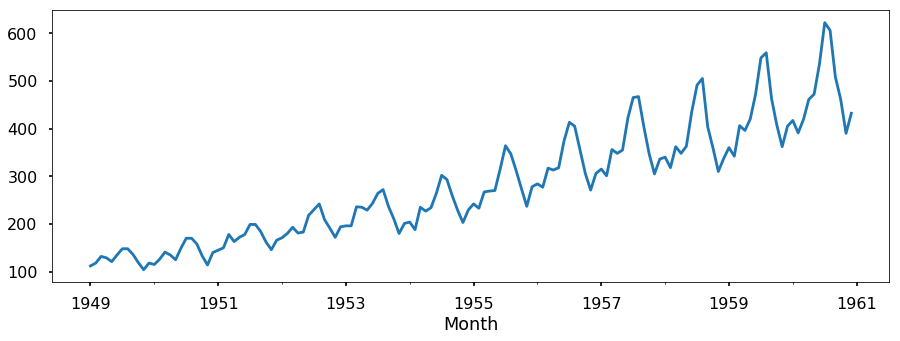

In [5]:
y.plot(figsize=(15,5))
plt.show()

In [7]:
p = d = q = range(0,3)

pdq = list(itertools.product(p,d,q))

seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p,d,q))]

In [13]:
warnings.filterwarnings("ignore")

best_output = [0, 0, 1000000]
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order = param,
                                            seasonal_order = param_seasonal,
                                            enforce_stationarity= False,
                                            enforce_invertibility= False
                                           )
            results = mod.fit()
            
            print('ARIMA {} x{} - AIC: {}'.format(param,param_seasonal,results.aic))
            
            if results.aic < best_output[2]:
                best_output = [param, param_seasonal, results.aic]
            
        except:
            continue
            
print('\nBest Output = ',best_output)

ARIMA (0, 0, 0) x(0, 0, 0, 12) - AIC: 2044.4329486427587
ARIMA (0, 0, 0) x(0, 0, 1, 12) - AIC: 1887.1433359537339
ARIMA (0, 0, 0) x(0, 0, 2, 12) - AIC: 1498.2861800647356
ARIMA (0, 0, 0) x(0, 1, 0, 12) - AIC: 1315.9211929474204
ARIMA (0, 0, 0) x(0, 1, 1, 12) - AIC: 1156.291490150854
ARIMA (0, 0, 0) x(0, 1, 2, 12) - AIC: 1016.136279733789
ARIMA (0, 0, 0) x(0, 2, 0, 12) - AIC: 1103.8641596230023
ARIMA (0, 0, 0) x(0, 2, 1, 12) - AIC: 942.1856088448575
ARIMA (0, 0, 0) x(0, 2, 2, 12) - AIC: 834.3017303458439
ARIMA (0, 0, 0) x(1, 0, 0, 12) - AIC: 1118.6259190717344
ARIMA (0, 0, 0) x(1, 0, 1, 12) - AIC: 1107.2562043238856
ARIMA (0, 0, 0) x(1, 0, 2, 12) - AIC: 1014.6452265987831
ARIMA (0, 0, 0) x(1, 1, 0, 12) - AIC: 1109.2437994445115
ARIMA (0, 0, 0) x(1, 1, 1, 12) - AIC: 1033.61721667297
ARIMA (0, 0, 0) x(1, 1, 2, 12) - AIC: 904.4213211127864
ARIMA (0, 0, 0) x(1, 2, 0, 12) - AIC: 974.4396269851046
ARIMA (0, 0, 0) x(1, 2, 1, 12) - AIC: 940.2370895732583
ARIMA (0, 0, 0) x(1, 2, 2, 12) - AIC: 83

ARIMA (0, 1, 2) x(1, 0, 2, 12) - AIC: 900.1407480711038
ARIMA (0, 1, 2) x(1, 1, 0, 12) - AIC: 936.7822150379475
ARIMA (0, 1, 2) x(1, 1, 1, 12) - AIC: 915.1111429658582
ARIMA (0, 1, 2) x(1, 1, 2, 12) - AIC: 820.9921775915475
ARIMA (0, 1, 2) x(1, 2, 0, 12) - AIC: 871.3719829150741
ARIMA (0, 1, 2) x(1, 2, 1, 12) - AIC: 824.0789557986476
ARIMA (0, 1, 2) x(1, 2, 2, 12) - AIC: 728.3909654378588
ARIMA (0, 1, 2) x(2, 0, 0, 12) - AIC: 918.4251433141368
ARIMA (0, 1, 2) x(2, 0, 1, 12) - AIC: 920.0741266360974
ARIMA (0, 1, 2) x(2, 0, 2, 12) - AIC: 896.441196137219
ARIMA (0, 1, 2) x(2, 1, 0, 12) - AIC: 849.1077294091848
ARIMA (0, 1, 2) x(2, 1, 1, 12) - AIC: 850.814323475467
ARIMA (0, 1, 2) x(2, 1, 2, 12) - AIC: 822.9785230026686
ARIMA (0, 1, 2) x(2, 2, 0, 12) - AIC: 770.1665719062037
ARIMA (0, 1, 2) x(2, 2, 1, 12) - AIC: 754.8857807881149
ARIMA (0, 1, 2) x(2, 2, 2, 12) - AIC: 729.0187073247682
ARIMA (0, 2, 0) x(0, 0, 0, 12) - AIC: 1441.350743331749
ARIMA (0, 2, 0) x(0, 0, 1, 12) - AIC: 1243.6526185

ARIMA (1, 0, 1) x(2, 1, 2, 12) - AIC: 839.2558089793436
ARIMA (1, 0, 1) x(2, 2, 0, 12) - AIC: 767.1156376895044
ARIMA (1, 0, 1) x(2, 2, 1, 12) - AIC: 752.2884897807289
ARIMA (1, 0, 1) x(2, 2, 2, 12) - AIC: 746.2099137902815
ARIMA (1, 0, 2) x(0, 0, 0, 12) - AIC: 1381.5217419605033
ARIMA (1, 0, 2) x(0, 0, 1, 12) - AIC: 1282.533198627649
ARIMA (1, 0, 2) x(0, 0, 2, 12) - AIC: 1036.5854046699558
ARIMA (1, 0, 2) x(0, 1, 0, 12) - AIC: 1009.2881584894241
ARIMA (1, 0, 2) x(0, 1, 1, 12) - AIC: 923.3041353900505
ARIMA (1, 0, 2) x(0, 1, 2, 12) - AIC: 836.4811525976361
ARIMA (1, 0, 2) x(0, 2, 0, 12) - AIC: 993.8462787290941
ARIMA (1, 0, 2) x(0, 2, 1, 12) - AIC: 832.6688985550007
ARIMA (1, 0, 2) x(0, 2, 2, 12) - AIC: 731.8305271469393
ARIMA (1, 0, 2) x(1, 0, 0, 12) - AIC: 1010.7058013458541
ARIMA (1, 0, 2) x(1, 0, 1, 12) - AIC: 984.2779180851637
ARIMA (1, 0, 2) x(1, 0, 2, 12) - AIC: 903.6275201236468
ARIMA (1, 0, 2) x(1, 1, 0, 12) - AIC: 937.6961869306488
ARIMA (1, 0, 2) x(1, 1, 1, 12) - AIC: 929.56

ARIMA (1, 2, 1) x(0, 2, 2, 12) - AIC: 729.7922161264034
ARIMA (1, 2, 1) x(1, 0, 0, 12) - AIC: 1073.3690518692308
ARIMA (1, 2, 1) x(1, 0, 1, 12) - AIC: 989.1843745202964
ARIMA (1, 2, 1) x(1, 0, 2, 12) - AIC: 907.8028836308371
ARIMA (1, 2, 1) x(1, 1, 0, 12) - AIC: 926.4582272211368
ARIMA (1, 2, 1) x(1, 1, 1, 12) - AIC: 918.4549191268827
ARIMA (1, 2, 1) x(1, 1, 2, 12) - AIC: 831.7807386453692
ARIMA (1, 2, 1) x(1, 2, 0, 12) - AIC: 860.6840937764687
ARIMA (1, 2, 1) x(1, 2, 1, 12) - AIC: 835.2565864866292
ARIMA (1, 2, 1) x(1, 2, 2, 12) - AIC: 731.792355014734
ARIMA (1, 2, 1) x(2, 0, 0, 12) - AIC: 912.2132872813125
ARIMA (1, 2, 1) x(2, 0, 1, 12) - AIC: 914.2073738175075
ARIMA (1, 2, 1) x(2, 0, 2, 12) - AIC: 905.7017500918015
ARIMA (1, 2, 1) x(2, 1, 0, 12) - AIC: 839.1221340834957
ARIMA (1, 2, 1) x(2, 1, 1, 12) - AIC: 839.2664443635715
ARIMA (1, 2, 1) x(2, 1, 2, 12) - AIC: 833.7807298933352
ARIMA (1, 2, 1) x(2, 2, 0, 12) - AIC: 759.6238190450896
ARIMA (1, 2, 1) x(2, 2, 1, 12) - AIC: 749.730077

ARIMA (2, 1, 0) x(2, 0, 2, 12) - AIC: 904.660681592117
ARIMA (2, 1, 0) x(2, 1, 0, 12) - AIC: 834.1388958374048
ARIMA (2, 1, 0) x(2, 1, 1, 12) - AIC: 836.1266432292769
ARIMA (2, 1, 0) x(2, 1, 2, 12) - AIC: 830.1164601147393
ARIMA (2, 1, 0) x(2, 2, 0, 12) - AIC: 753.6967977947572
ARIMA (2, 1, 0) x(2, 2, 1, 12) - AIC: 739.2466160945728
ARIMA (2, 1, 0) x(2, 2, 2, 12) - AIC: 740.0381148279664
ARIMA (2, 1, 1) x(0, 0, 0, 12) - AIC: 1361.38578426425
ARIMA (2, 1, 1) x(0, 0, 1, 12) - AIC: 1168.3690522219388
ARIMA (2, 1, 1) x(0, 0, 2, 12) - AIC: 1027.9355068034833
ARIMA (2, 1, 1) x(0, 1, 0, 12) - AIC: 1010.5527133808541
ARIMA (2, 1, 1) x(0, 1, 1, 12) - AIC: 932.8765080682751
ARIMA (2, 1, 1) x(0, 1, 2, 12) - AIC: 850.9179939659078
ARIMA (2, 1, 1) x(0, 2, 0, 12) - AIC: 998.6256173782757
ARIMA (2, 1, 1) x(0, 2, 1, 12) - AIC: 837.5693419928544
ARIMA (2, 1, 1) x(0, 2, 2, 12) - AIC: 732.9767982197976
ARIMA (2, 1, 1) x(1, 0, 0, 12) - AIC: 998.8582677504924
ARIMA (2, 1, 1) x(1, 0, 1, 12) - AIC: 988.25284

In [14]:
best_output

[(2, 1, 2), (0, 2, 2, 12), 715.1570605843473]

In [35]:
mod1 = sm.tsa.statespace.SARIMAX(y,
                                order = (best_output[0][0], best_output[0][1],best_output[0][1]),
                                seasonal_order = (best_output[1][0], best_output[1][1], best_output[1][2], best_output[1][3]),
                                enforce_stationarity = False,
                                enforce_invertibility =False)

results1 = mod1.fit()

print(results1.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.1856      0.195     -6.092      0.000      -1.567      -0.804
ar.L2         -0.4353      0.099     -4.411      0.000      -0.629      -0.242
ma.L1          0.7787      0.204      3.812      0.000       0.378       1.179
ma.S.L12      -1.4145      0.227     -6.239      0.000      -1.859      -0.970
ma.S.L24       0.4839      0.143      3.381      0.001       0.203       0.764
sigma2       118.5131     28.038      4.227      0.000      63.560     173.466


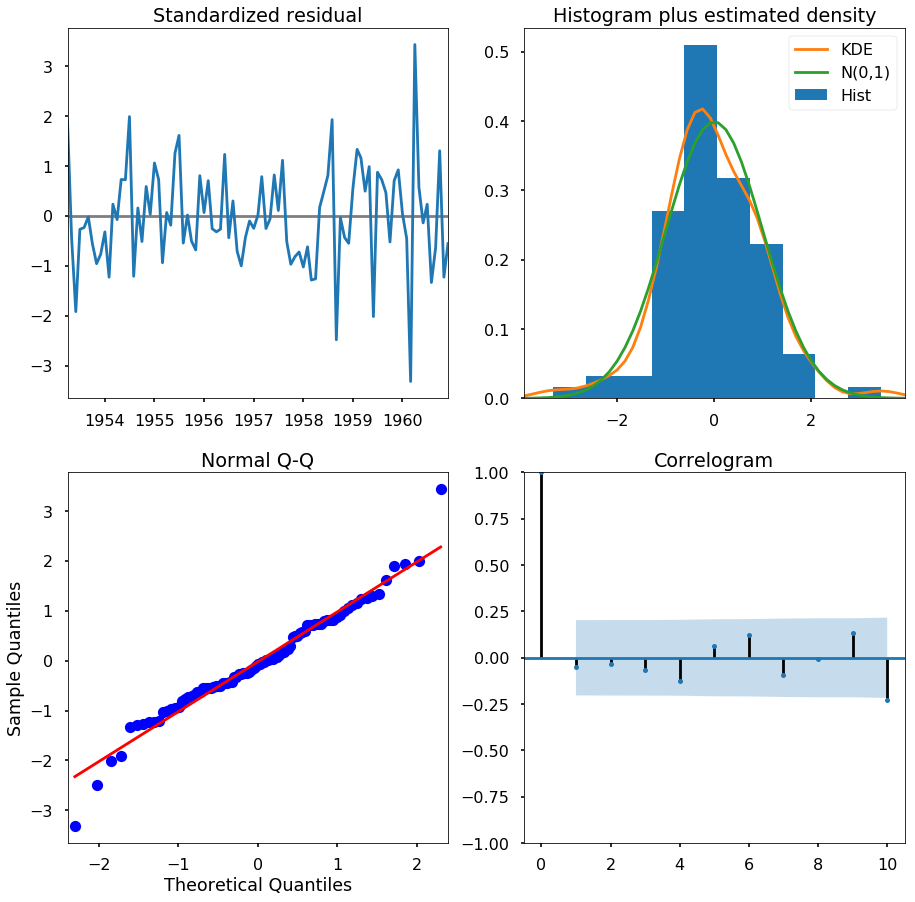

In [36]:
results1.plot_diagnostics(figsize=(15, 15))
plt.show()

# One Step Ahead Forecast


In [39]:
predone = results1.get_prediction(start=pd.to_datetime('1958-01-01'), dynamic=False)
predone_ci = predone.conf_int()

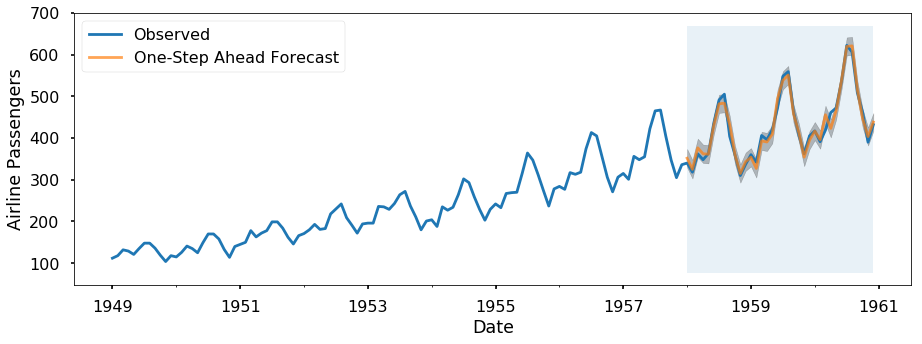

In [41]:
ax = y['1949':].plot(label='Observed', figsize=(15, 5))
predone.predicted_mean.plot(ax=ax, label='One-Step Ahead Forecast', alpha=.7)

ax.fill_between(predone_ci.index,
                predone_ci.iloc[:, 0],
                predone_ci.iloc[:, 1], color='k', alpha=.25)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('1958-01-01'), y.index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('Airline Passengers')
plt.legend()

plt.show()

In [44]:
y_forecasted = predone.predicted_mean
y_truth = y['1958-01-01':]

mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 194.81
